# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count
len(cities)


614

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

city_name= []
country = []
city_lat = []
city_lon = []
temp = []
humid = []
cloud = []
wind = []
date = []

# Loop through the list of cities and perform a request for data on each
for count in range(len(cities)):
    
    try:
        response = requests.get(query_url + cities[count]).json() 
        print(f'Processing record {count} for {cities[count]}')
        
        city_name.append(response["name"])
        country.append(response["sys"]["country"])
        city_lat.append(response["coord"]["lat"])
        city_lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humid.append(response["main"]["humidity"])
        cloud.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        date.append(response["dt"])
        
        time.sleep(.300)
        
    except (KeyError, IndexError):
        print(f'Cannot find weather data for city {cities[count]}')
              


Processing record 0 for punta arenas
Processing record 1 for puerto ayora
Processing record 2 for lagoa
Processing record 3 for sindou
Processing record 4 for georgetown
Processing record 5 for okmulgee
Processing record 6 for pisco
Processing record 7 for upernavik
Processing record 8 for arraial do cabo
Processing record 9 for trinidad
Processing record 10 for rio grande
Processing record 11 for bengkulu
Cannot find weather data for city bengkulu
Processing record 12 for naze
Processing record 13 for atuona
Processing record 14 for thompson
Processing record 15 for albany
Processing record 16 for taolanaro
Cannot find weather data for city taolanaro
Processing record 17 for pa sang
Processing record 18 for rikitea
Processing record 19 for luderitz
Processing record 20 for new norfolk
Processing record 21 for chauny
Processing record 22 for bethel
Processing record 23 for ushuaia
Processing record 24 for constitucion
Processing record 25 for dikson
Processing record 26 for camabatela


Processing record 205 for nizhneangarsk
Processing record 206 for lata
Processing record 207 for mto wa mbu
Processing record 208 for moose factory
Processing record 209 for utiel
Processing record 210 for pimenta bueno
Processing record 211 for cervo
Processing record 212 for saint-pierre
Processing record 213 for victoria
Processing record 214 for constantine
Processing record 215 for tuktoyaktuk
Processing record 216 for manaus
Processing record 217 for jiuquan
Processing record 218 for hilo
Processing record 219 for eirunepe
Processing record 220 for haapiti
Processing record 221 for tazovskiy
Processing record 222 for sao sepe
Processing record 223 for ornskoldsvik
Processing record 224 for saint-philippe
Processing record 225 for tabiauea
Cannot find weather data for city tabiauea
Processing record 226 for melfort
Processing record 227 for wasco
Processing record 228 for saldanha
Processing record 229 for sovetskaya gavan
Processing record 230 for tongling
Processing record 231 f

Processing record 417 for quatre cocos
Processing record 418 for pangnirtung
Processing record 419 for cayenne
Processing record 420 for marsa matruh
Processing record 421 for chicama
Processing record 422 for manturovo
Processing record 423 for vanimo
Processing record 424 for lufkin
Processing record 425 for aguimes
Processing record 426 for bayburt
Processing record 427 for ojinaga
Processing record 428 for karratha
Processing record 429 for querecotillo
Processing record 430 for rabo de peixe
Processing record 431 for bargal
Cannot find weather data for city bargal
Processing record 432 for berlevag
Processing record 433 for gladstone
Processing record 434 for dingle
Processing record 435 for iralaya
Processing record 436 for yarovoye
Processing record 437 for qiongshan
Processing record 438 for makakilo city
Processing record 439 for ponta do sol
Processing record 440 for college
Processing record 441 for jibuti
Cannot find weather data for city jibuti
Processing record 442 for pi

In [4]:
#print(json.dumps(response, indent=4, sort_keys=True))

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
raw_temp_df = pd.DataFrame({"City Name": city_name, "Country": country, "Latitude": city_lat, "Longitude": city_lon, "Date":date, "Temp": temp, "Humidity":humid, "Cloud Coverage":cloud,
                    "Wind Speed": wind})

temp_df = raw_temp_df.dropna()

temp_df.head()


,City Name,Country,Latitude,Longitude,Date,Temp,Humidity,Cloud Coverage,Wind Speed
0,Punta Arenas,CL,-53.16,-70.91,1570555524,48.20,39,75,33.33
1,Puerto Ayora,EC,-0.74,-90.35,1570555523,75.20,60,20,21.92
2,Lagoa,PT,37.14,-8.45,1570555694,78.01,69,0,5.82
3,Sindou,BF,10.66,-5.16,1570555695,81.41,71,91,0.81
4,Georgetown,GY,6.80,-58.16,1570555433,89.60,62,75,13.87


In [6]:
#export to csv
# Note to avoid any issues later, use encoding="utf-8"
temp_df.to_csv("city_lat_weather.csv", encoding="utf-8", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [7]:
time_stamp = pd.to_datetime(date[0], unit = 's')

format_time = time_stamp.strftime('%b/%d/%Y')


'Oct/08/2019'

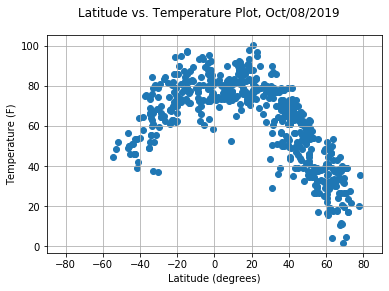

In [8]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Temperature Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Temperature (F)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(temp) - 5, np.max(temp) + 5)
ax.scatter(city_lat, temp)
ax.grid()
plt.show()

#### Latitude vs. Humidity Plot

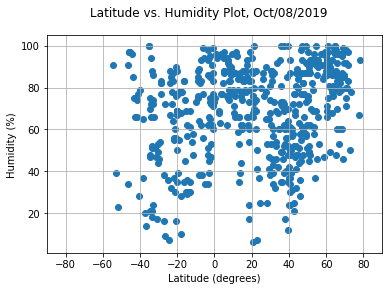

In [9]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Humidity Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Humidity (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(humid) - 5, np.max(humid) + 5)
ax.scatter(city_lat, humid)
ax.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

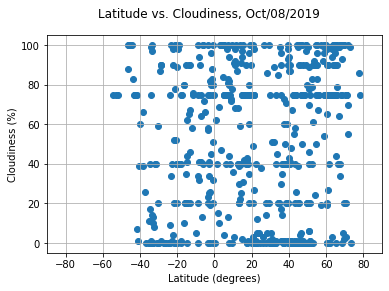

In [10]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Cloudiness, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Cloudiness (%)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(cloud) - 5, np.max(cloud) + 5)
ax.scatter(city_lat, cloud)
ax.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

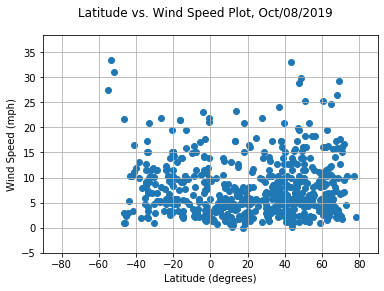

In [11]:
fig, ax = plt.subplots()

fig.suptitle(f"Latitude vs. Wind Speed Plot, {format_time}")
ax.set_xlabel("Latitude (degrees)")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlim(-90, 90)
ax.set_ylim(np.min(wind) - 5, np.max(wind) + 5)
ax.scatter(city_lat, wind)
ax.grid()
plt.show()